Before training any models, it's useful to see how our different exogenous variables correlate to realized extractable value

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

total_gas_fees                        0.087883
arbitrages_count                      0.083154
base_fee_per_gas_in_eth               0.066455
liquidations_count                    0.049498
gas_used                              0.044201
block_fullness                        0.044201
sandwiches_count                      0.026433
network_demand                        0.012891
sandwiched_swaps_count                0.008363
base_fee_change_percentage            0.007530
validator_is_registered_with_relay   -0.007486
is_fb_builder                        -0.007606
Name: proposer_total_reward_in_eth, dtype: float64


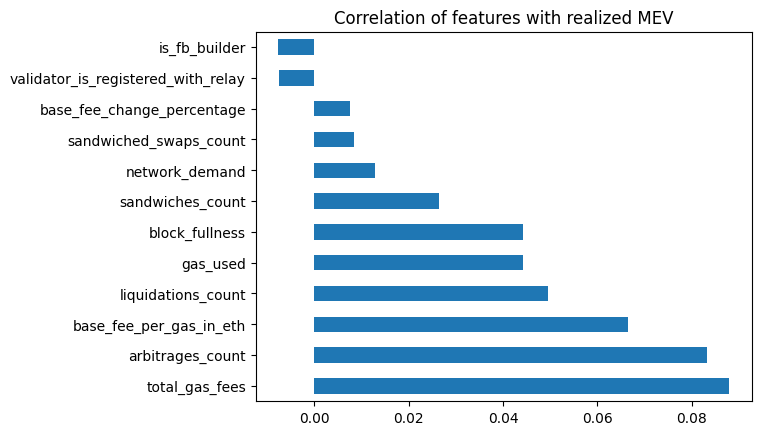

In [13]:
blocks_df = pd.read_csv('../Data/block_data_ready_cleaned.csv')

correlation_matrix = blocks_df.corr()

# Extract the correlation of all features with 'proposer_total_reward_in_eth' (our target, the realized MEV)
correlation_with_mev = correlation_matrix['proposer_total_reward_in_eth']

# Sort the correlations for better readability
sorted_correlation = correlation_with_mev.sort_values(ascending=False)

# drop the correlation with itself and the hour of day
sorted_correlation = sorted_correlation.drop(['proposer_total_reward_in_eth', 'hour_of_day'])

# put in a chart and title it
ax = sorted_correlation.plot.barh(title='Correlation of features with realized MEV')

print(sorted_correlation)

<Axes: title={'center': 'Average realized MEV per hour of day (UTC)'}, xlabel='hour_of_day'>

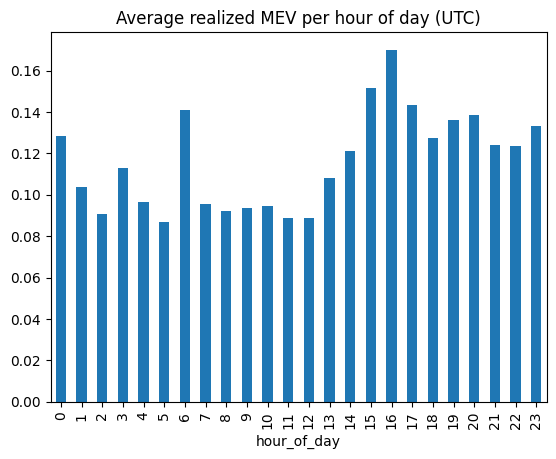

In [23]:
# get average realized MEV per hour of day and plot on bar graph
average_mev_per_hour = blocks_df.groupby('hour_of_day')['proposer_total_reward_in_eth'].mean()
average_mev_per_hour.plot.bar(title='Average realized MEV per hour of day (UTC)')

In [36]:
#load in the csv that has block data as well
blocks_df_dirty = pd.read_csv('../Data/block_data_ready.csv')

# add the block_numer column from blocks_df_dirty to blocks_df
blocks_df['block_number'] = blocks_df_dirty['block_number']

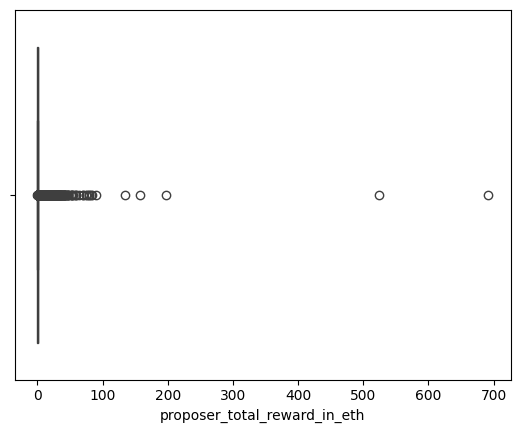

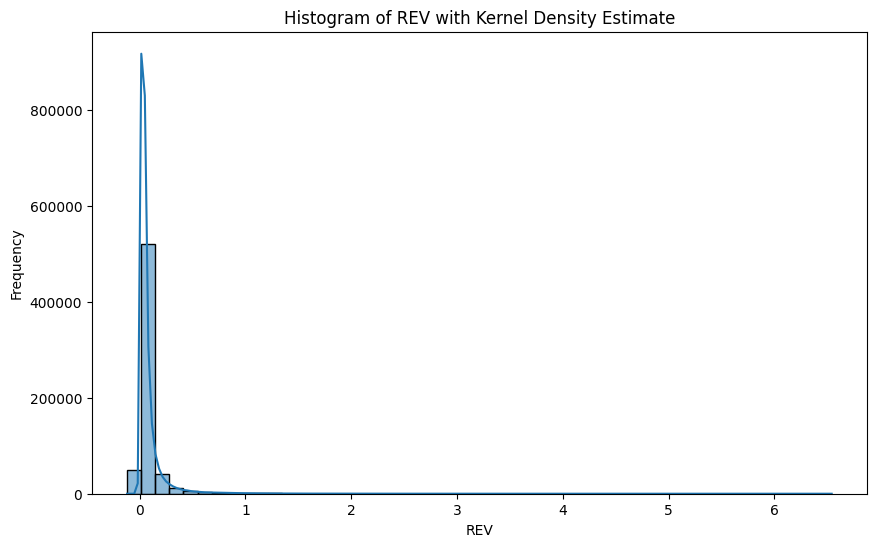

In [66]:
sns.boxplot(x=blocks_df['proposer_total_reward_in_eth'])

# Histogram for MEV
plt.figure(figsize=(10, 6))
#sns.histplot(blocks_df['proposer_total_reward_in_eth'].dropna(), bins=50, kde=True)
sns.histplot(np.log1p(blocks_df['proposer_total_reward_in_eth'].dropna()), bins=50, kde=True)
plt.title('Histogram of REV with Kernel Density Estimate')
plt.xlabel('REV')
plt.ylabel('Frequency')
plt.show()